In [27]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load and Clean Data

In [2]:
calendar = pd.read_csv("Data/calendar.csv", parse_dates=["date"], index_col='date')

In [3]:
calendar.keys()

Index([u'listing_id', u'available', u'price', u'metro_area'], dtype='object')

In [4]:
calendar[:10]

,listing_id,available,price,metro_area
date,,,,
2018-03-05,2515,t,$69.00,NYC
2018-03-04,2515,t,$69.00,NYC
2018-03-03,2515,t,$69.00,NYC
2018-03-02,2515,t,$69.00,NYC
2018-03-01,2515,t,$69.00,NYC
2018-02-28,2515,t,$59.00,NYC
2018-02-27,2515,t,$59.00,NYC
2018-02-26,2515,t,$59.00,NYC
2018-02-25,2515,t,$59.00,NYC


In [5]:
# convert 't' and 'f' in dataset to 1 and 0
calendar['available'] = (calendar['available']=='t').astype(int)

In [6]:
# convert price to float
calendar['price'] = calendar['price'].replace('[\$,)]', '', regex=True).astype(float)

In [7]:
calendar[:10]

,listing_id,available,price,metro_area
date,,,,
2018-03-05,2515,1,69.0,NYC
2018-03-04,2515,1,69.0,NYC
2018-03-03,2515,1,69.0,NYC
2018-03-02,2515,1,69.0,NYC
2018-03-01,2515,1,69.0,NYC
2018-02-28,2515,1,59.0,NYC
2018-02-27,2515,1,59.0,NYC
2018-02-26,2515,1,59.0,NYC
2018-02-25,2515,1,59.0,NYC


# Price and Availability by City

In [8]:
calendar['metro_area'].unique()

array(['NYC', 'denver', 'chicago', 'boston', 'dc'], dtype=object)

In [9]:
# the average price for each city
calendar.groupby('metro_area')['price'].aggregate(np.mean)

metro_area
NYC        165.904913
boston     198.438909
chicago    167.022702
dc         243.322393
denver     145.892388
Name: price, dtype: float64

In [34]:
unique_calendar = calendar[NYC].groupby([pd.TimeGrouper('M'), 'metro_area', 'listing_id']).aggregate(np.mean)

In [ ]:
NYC = unique_calendar['metro_area']=='NYC'
denver = unique_calendar['metro_area']=='denver'
chicago = unique_calendar['metro_area']=='chicago'
boston = unique_calendar['metro_area']=='boston'
dc = unique_calendar['metro_area']=='dc'

In [11]:
NYC_unique_calendar = calendar[NYC].groupby([pd.TimeGrouper('M'), 'listing_id']).aggregate(np.mean)

In [12]:
NYC_unique_calendar[:10]

available       price
date       listing_id                       
2017-05-31 2515         0.166667   92.000000
           2595         1.000000  216.600000
           3647         1.000000  150.000000
           3831         0.000000         NaN
           4611         0.133333   46.000000
           5099         0.233333  202.714286
           5107         0.137931  237.500000
           5121         1.000000   60.000000
           5172         0.275862  149.000000
           5178         0.066667   79.000000

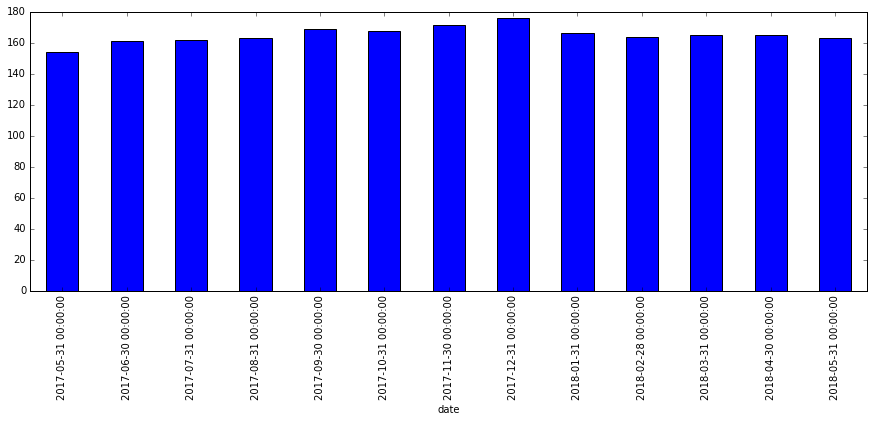

In [23]:
# monthly average price by all unique listings for NYC
price = NYC_unique_calendar.groupby(level=['date']).mean().dropna()['price']
price.plot(kind='bar', figsize=(15,5))

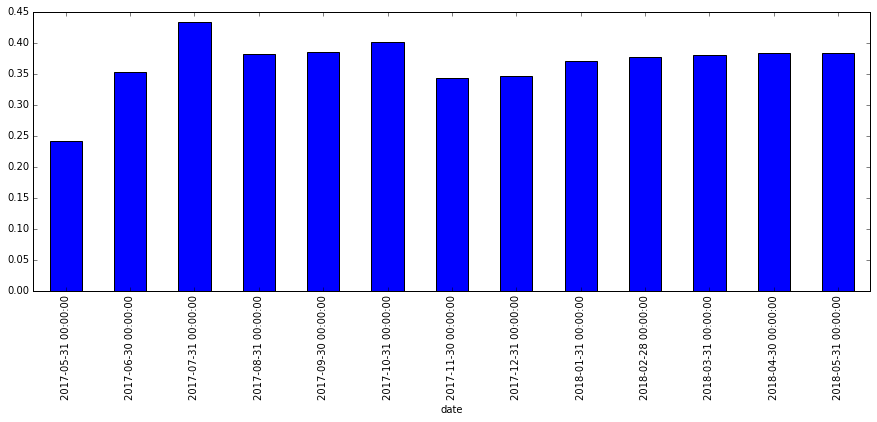

In [24]:
# monthly average availability by all unique listings for NYC
availability = NYC_unique_calendar.groupby(level=['date']).mean().dropna()['available']
availability.plot(kind='bar', figsize=(15,5))

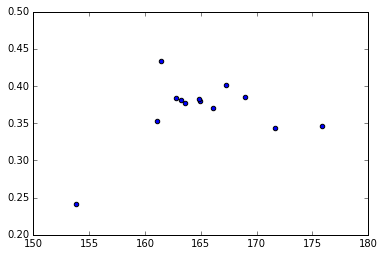

In [30]:
# monthly price vs. availability by all unique listings for NYC
plt.scatter(price, availability)
del price, availability

In [ ]:
# monthly average availability by all unique listings for NYC
NYC_unique_calendar['availability'].resample('M', how=np.mean).plot(kind='bar', figsize=(15,5))

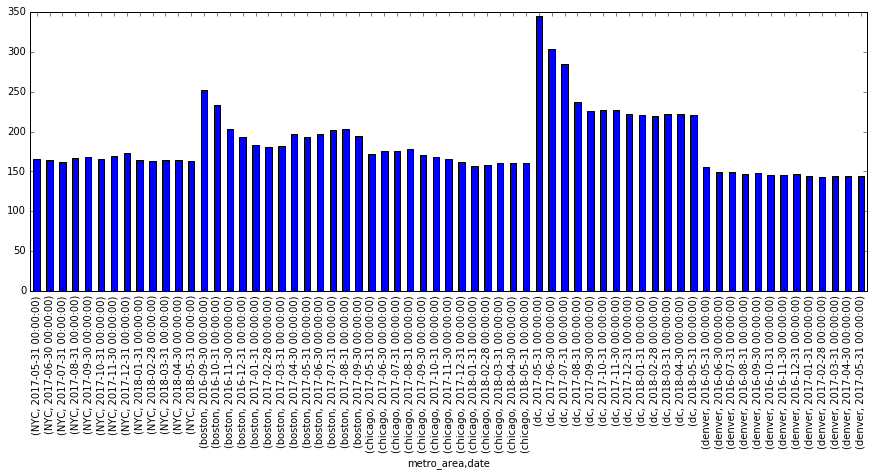

In [65]:
# all 5 cities shown below - monthly average price by all listings
calendar.groupby('metro_area')['price'].resample('M', how=np.mean).plot(kind='bar', figsize=(15,5))

## Available Listings

We look at the total number of unique listings (by listing ID) that were available each month and each week.

In [30]:
# unique listing IDs
calendar.listing_id.unique(kind='bar', figsize=(15,5))

array([    2515,     2595,     3647, ..., 17792195, 18223756, 18364166])

In [18]:
calendar.groupby('listing_id')['available'].resample('M', how=np.sum).plot(kind='bar', figsize=(15,5))

/Users/mattzhang/py2_kernel/lib/python2.7/site-packages/pandas/core/groupby.py:1138: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  return get_resampler_for_grouping(self, rule, *args, **kwargs)


KeyboardInterrupt: 

/Users/mattzhang/py2_kernel/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  from ipykernel import kernelapp as app


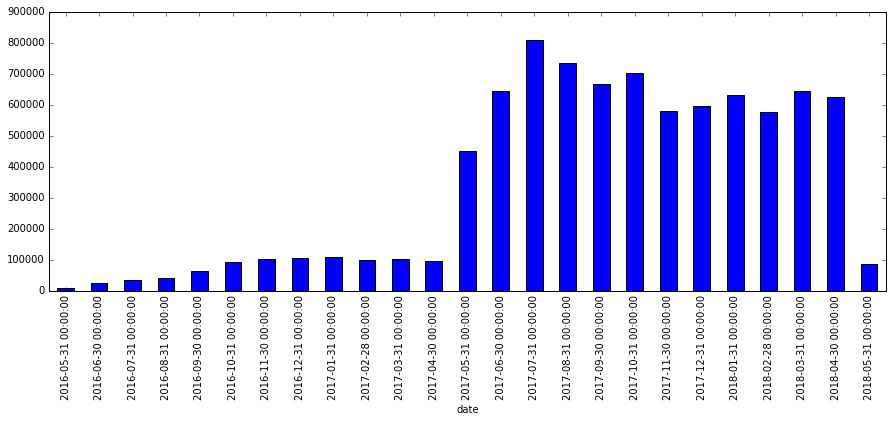

In [7]:
# monthly data for total number of available bookings
calendar['available'].resample('M', how=np.sum).plot(kind='bar', figsize=(15,5))

/Users/mattzhang/py2_kernel/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  from ipykernel import kernelapp as app


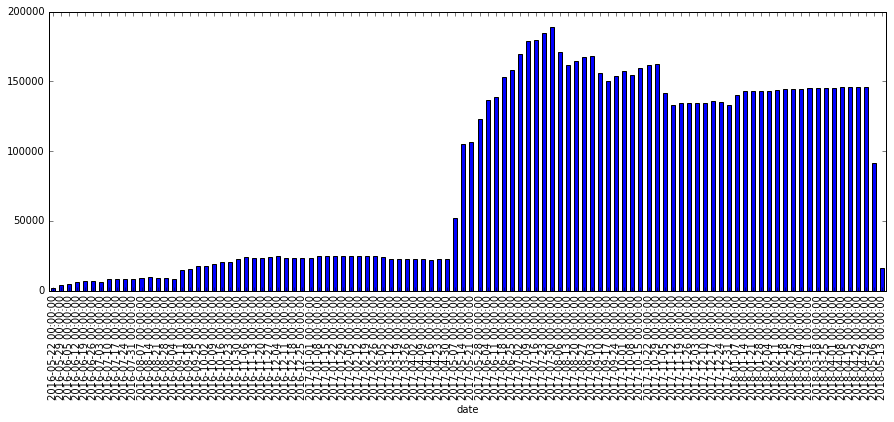

In [8]:
# weekly data for total number of available bookings
calendar['available'].resample('W', how=np.sum).plot(kind='bar', figsize=(15,5))

In [ ]:
# average price of all listings (available and unavailable) by month
calendar['price'].resample('M', how=np.mean).plot(kind='bar', figsize=(15,5))

In [ ]:
# listings by day
berri_bikes.index.weekday